# Face emotions analysis

In [1]:
from fastai import *
from fastai.vision import *
import pdb

## CK +

Face emotion classifier using the [CK+ dataset](http://www.pitt.edu/~emotion/ck-spread.htm)

In [67]:
path = Path('../../datasets/CK+/')
image_path = path/'cohn-kanade-images'
anno_path = path/'Emotion'

In [3]:
path.ls()

[PosixPath('../../datasets/CK+/FACS'),
 PosixPath('../../datasets/CK+/Landmarks'),
 PosixPath('../../datasets/CK+/FACS_labels.zip'),
 PosixPath('../../datasets/CK+/Emotion'),
 PosixPath('../../datasets/CK+/__MACOSX'),
 PosixPath('../../datasets/CK+/ReadMeCohnKanadeDatabase_website.txt'),
 PosixPath('../../datasets/CK+/CVPR2010_CK.pdf'),
 PosixPath('../../datasets/CK+/extended-cohn-kanade-images.zip'),
 PosixPath('../../datasets/CK+/Consent-for-publication (1).doc'),
 PosixPath('../../datasets/CK+/Emotion_labels.zip'),
 PosixPath('../../datasets/CK+/Landmarks.zip'),
 PosixPath('../../datasets/CK+/cohn-kanade-images')]

### Get the Data

In [4]:
def find_idx_last(item):
    """
    return the index of the last image for a given person and a given emotion.
    """
    # path to the folder containing all the images 
    p = image_path/('/'.join(item.parts[-3:-1]))
    # only keep actual numbers as ls also list hidden files
    l = lambda x : int(x) if x.isdigit() else -1
    # find the number of the last image in the folder
    m = max([l(f.parts[-1][-6:-4]) for f in p.ls()])
    return m

In [74]:
classes = {
    0: "neutral",
    1: "anger",
    2: "contempt",
    3: "disgust",
    4: "fear",
    5: "happiness",
    6: "sadness",
    7: "surprise",
}

In [75]:
def annotate(item):
    """
    return the label associated with `item`. Return `None` if there's no label associated with `item`.
    """
    m = find_idx_last(item)
    p = anno_path/('/'.join(item.parts[-3:])[:-6] + str(m) + '_emotion.txt')
    # sometimes there's no label so we return None and it gets filtered out by filter_last
    try:
        with p.open() as f:
            return classes[int((f.readline()[3:4]))]
    except:
        return None

In [76]:
def filter_last(item):
    """
    only keep the last half of all the images for a given person and a given emotion
    """
    m = find_idx_last(item)
    # flag is true if the emotion is labeled
    flag = True if annotate(item) else False 
    # return True if item is of the last half of the images for a given person and a given emotion
    return (int(item.parts[-1][-6:-4]) > m//2) and flag

In [77]:
tfms = get_transforms()
# pdb.set_trace()
data = (ImageItemList.from_folder(image_path) #Where to find the data? -> in path and its subfolders
        .filter_by_func(filter_last)
        .random_split_by_pct()              #How to split in train/valid? -> use the folders
        .label_from_func(annotate)            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())    

In [59]:
data.classes

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

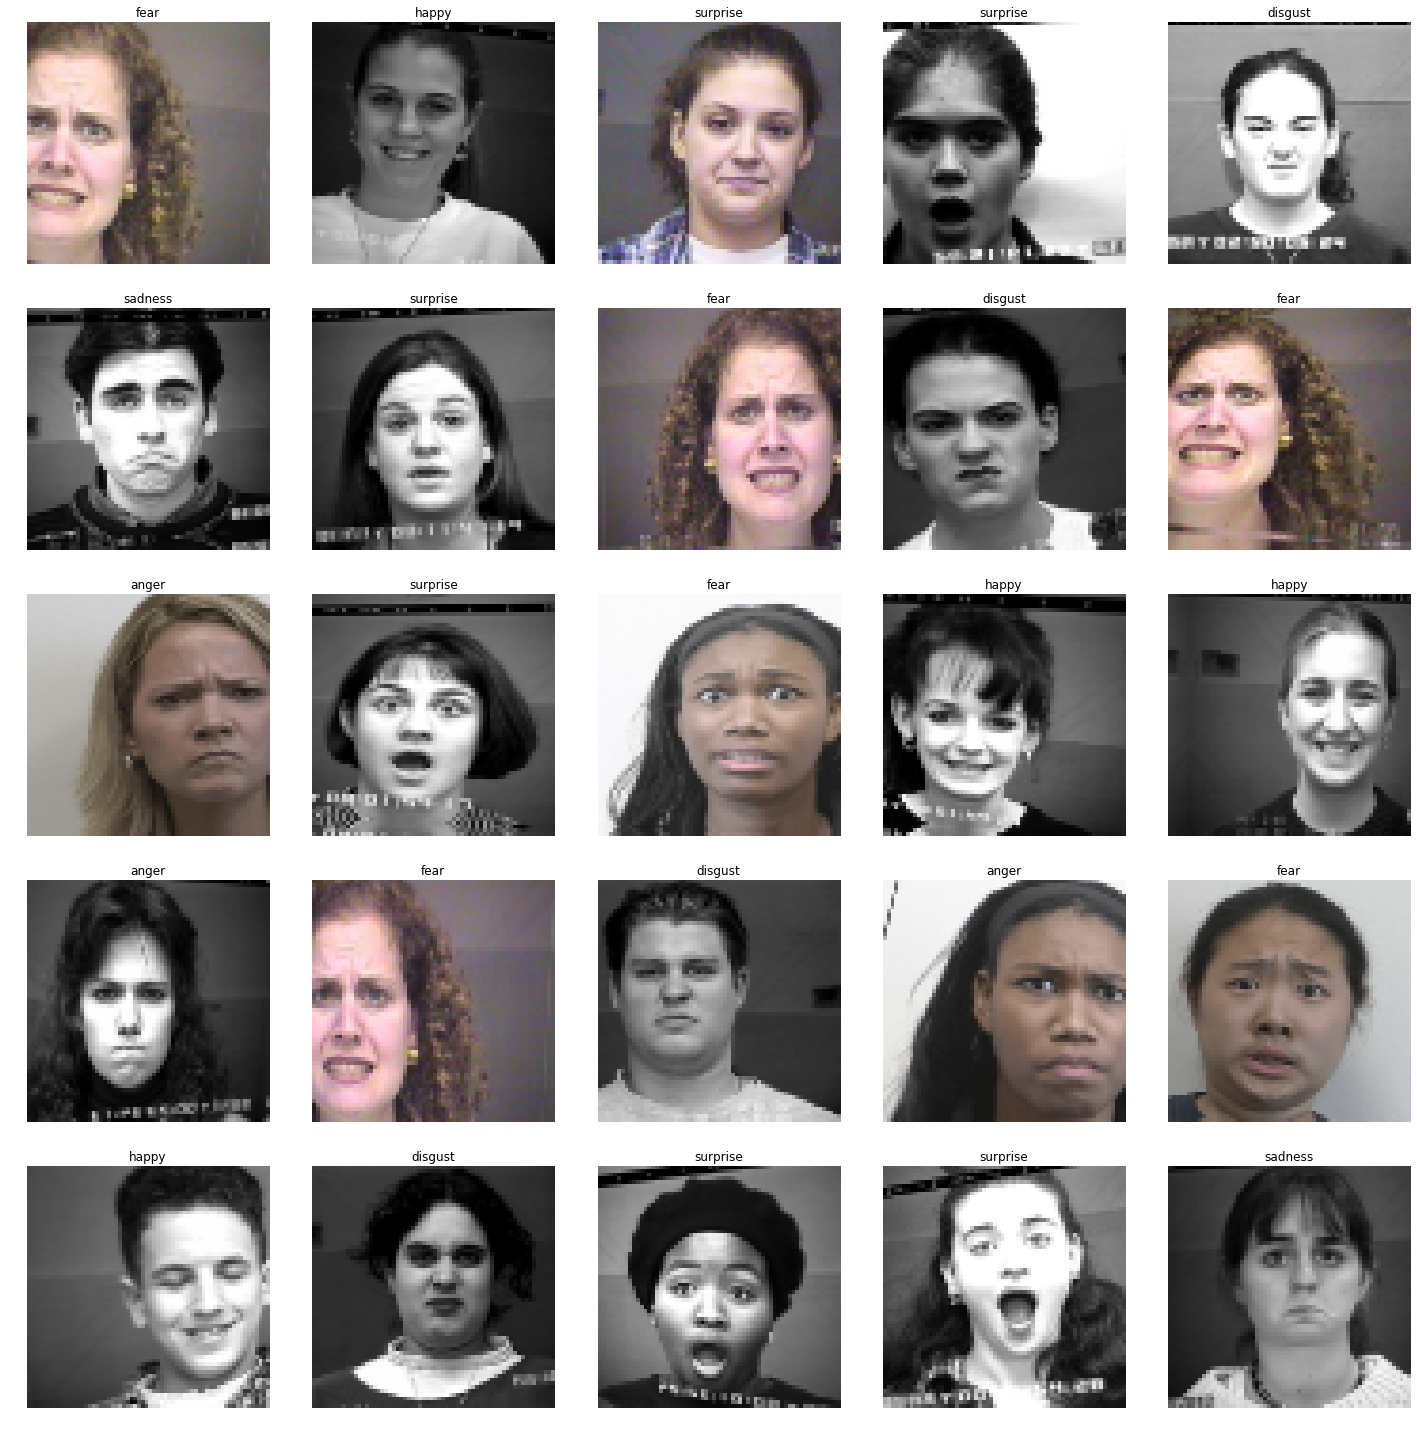

In [99]:
data.show_batch()

### Build the classifier and train it

In [9]:
learner = create_cnn(data, models.resnet50, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


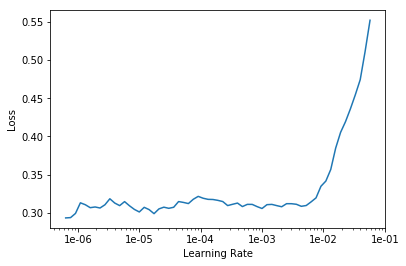

In [12]:
learner.lr_find()
learner.recorder.plot()

In [45]:
lr = 5e-3

In [46]:
learner.freeze()

In [47]:
learner.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,accuracy
1,2.174836,1.777648,0.345238
2,1.766037,1.178493,0.591837
3,1.462601,0.936673,0.675170
4,1.275365,0.816113,0.702381
5,1.172160,0.798662,0.712585


In [48]:
learner.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,accuracy
1,1.009918,0.733625,0.722789
2,0.963895,0.566627,0.802721
3,0.910637,0.499384,0.823129
4,0.834024,0.456755,0.846939
5,0.798527,0.441464,0.852041


In [49]:
learner.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,accuracy
1,0.768636,0.416571,0.867347
2,0.709785,0.380873,0.858844
3,0.664317,0.321266,0.896259
4,0.606824,0.297661,0.908163
5,0.587976,0.284056,0.909864


In [50]:
learner.save('m-resnet34-2')

In [51]:
learner.load('m-resnet34-2');

In [52]:
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


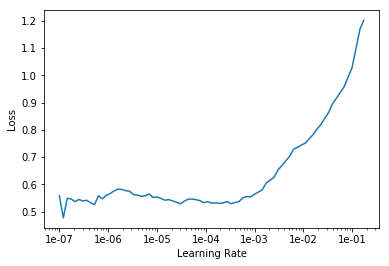

In [53]:
learner.lr_find()
learner.recorder.plot(skip_start=0)

In [14]:
lr = 2e-6
lrs = learner.lr_range(slice(lr))

In [15]:
learner.fit_one_cycle(5, lrs)

epoch,train_loss,valid_loss,accuracy
1,0.348179,0.138058,0.964286
2,0.333070,0.140917,0.962585
3,0.320198,0.144241,0.957483
4,0.321943,0.138659,0.962585
5,0.341424,0.140438,0.962585


In [56]:
learner.fit_one_cycle(5, lrs)

epoch,train_loss,valid_loss,accuracy
1,0.550304,0.285215,0.904762
2,0.529187,0.291035,0.908163
3,0.555182,0.290478,0.911565
4,0.556217,0.288036,0.913265
5,0.567819,0.290743,0.899660


In [57]:
learner.fit_one_cycle(5, lrs)

epoch,train_loss,valid_loss,accuracy
1,0.544040,0.286919,0.909864
2,0.533360,0.284175,0.911565
3,0.565051,0.292199,0.909864
4,0.545146,0.283411,0.913265
5,0.547038,0.283735,0.911565


In [58]:
learner.save('m-resnet34-3')

In [42]:
learner

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (2352 items)
[Category disgust, Category disgust, Category disgust, Category disgust, Category disgust]...
Path: ../../datasets/CK+/cohn-kanade-images
x: ImageItemList (2352 items)
[Image (3, 490, 640), Image (3, 490, 640), Image (3, 490, 640), Image (3, 490, 640), Image (3, 490, 640)]...
Path: ../../datasets/CK+/cohn-kanade-images;

Valid: LabelList
y: CategoryList (588 items)
[Category happy, Category anger, Category disgust, Category happy, Category surprise]...
Path: ../../datasets/CK+/cohn-kanade-images
x: ImageItemList (588 items)
[Image (3, 490, 640), Image (3, 490, 640), Image (3, 490, 640), Image (3, 490, 640), Image (3, 490, 640)]...
Path: ../../datasets/CK+/cohn-kanade-images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(i

In [10]:
learner.load('m-3');

In [28]:
learner.path

PosixPath('../../datasets/CK+/cohn-kanade-images')

In [11]:
learner.export()

In [13]:
preds,y,losses = learner.get_preds(with_loss=True)

In [14]:
interp = ClassificationInterpretation(data, preds, y, losses)

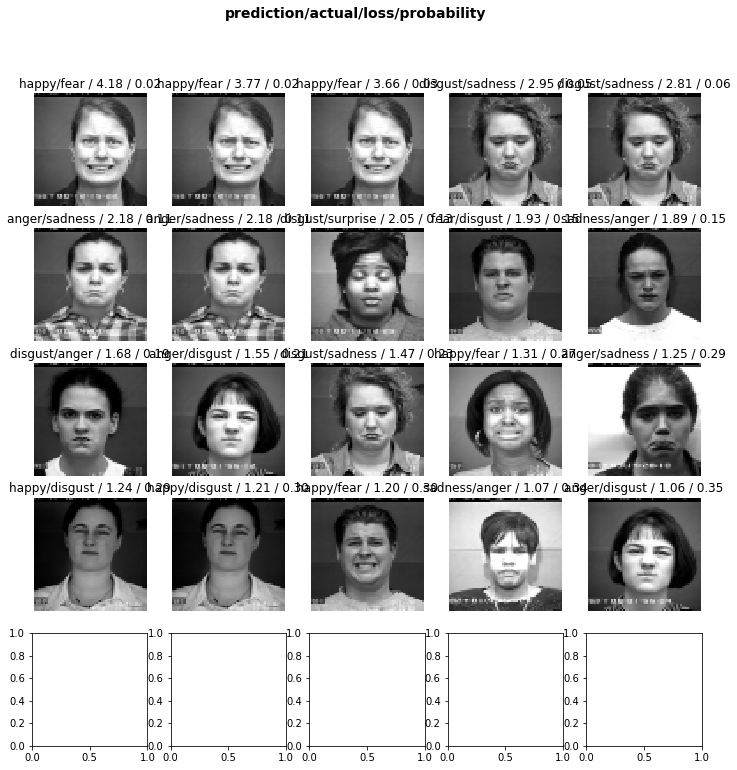

In [15]:
interp.plot_top_losses(20)

In [12]:
my_learner = load_learner(image_path, map_location='cpu')

In [18]:
interp = ClassificationInterpretation(data, preds, y, losses)

In [17]:
preds,y,losses = learner.get_preds(with_loss=True)

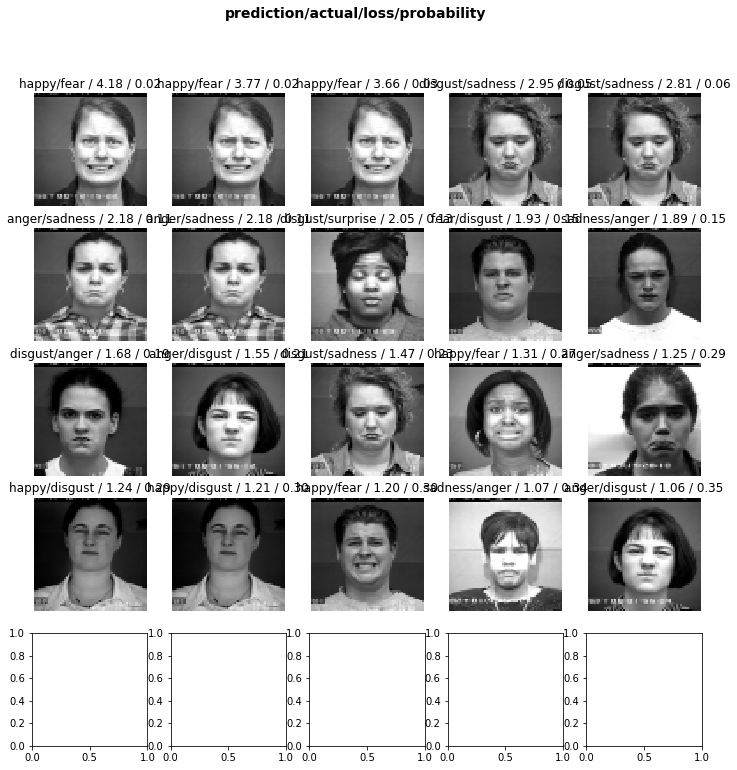

In [19]:
interp.plot_top_losses(20)

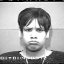

In [14]:
data.valid_ds[2][0]

In [16]:
import timeit
start_time = timeit.default_timer()
print(my_learner.predict(data.valid_ds[2][0])[0])
elapsed = timeit.default_timer() - start_time
elapsed

sadness


0.022301823992165737

## Facial Expressions

Face emotion classifier using the [Facial Expressions dataset](https://github.com/muxspace/facial_expressions)

In [96]:
path2 = Path('../../datasets/facial_expressions/')
image_path2 = path2/'images'
anno_path2 = path2/'data'

In [97]:
anno_path2.ls()

[PosixPath('../../datasets/facial_expressions/data/legend.csv'),
 PosixPath('../../datasets/facial_expressions/data/500_picts_satz.csv')]

In [98]:
labels = pd.read_csv(anno_path2/'legend.csv')

In [99]:
labels.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [100]:
labels = labels.drop(['user.id'], axis=1)

In [101]:
labels['emotion'] = labels['emotion'].str.lower()

In [102]:
labels['emotion'].unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness', 'sadness', 'contempt'], dtype=object)

In [103]:
labels.loc[labels['image'] == 'Aaron_Eckhart_0001.jpg']['emotion'].values[0]

'neutral'

In [108]:
data.train_ds.items[0].parts[-1]

'S058_006_00000018.png'

In [116]:
def annotate_faces(item):
    try:
        #print(item)
        return labels.loc[labels['image'] == item.parts[-1]]['emotion'].values[0]
    except:
        return None

In [117]:
def filter_faces(item):
    return True if annotate_faces(item) else False

In [118]:
tfms = get_transforms()
# pdb.set_trace()
data2 = (ImageItemList.from_folder(image_path2) #Where to find the data? -> in path and its subfolders
        .filter_by_func(filter_faces)
        .random_split_by_pct()              #How to split in train/valid? -> use the folders
        .label_from_func(annotate_faces)            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())    

In [119]:
learner = create_cnn(data2, models.resnet50, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


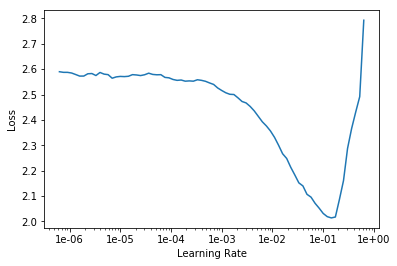

In [120]:
learner.lr_find()
learner.recorder.plot()

In [121]:
lr = 9e-3

In [122]:
learner.freeze()

In [123]:
learner.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy
1,0.859086,0.591898,0.790936
2,0.608827,0.511213,0.823465
3,0.523275,0.440115,0.842836
4,0.459998,0.424313,0.846491
5,0.416572,0.385350,0.866228


In [124]:
learner.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy
1,0.468500,0.501740,0.827485
2,0.507708,0.615271,0.769006
3,0.493099,0.437907,0.847953
4,0.452373,0.396438,0.861477
5,0.404348,0.365495,0.870980


In [125]:
learner.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy
1,0.409940,0.449746,0.830044
2,0.471292,0.471208,0.832237
3,0.456282,0.416702,0.854898
4,0.414021,0.360758,0.868787
5,0.358202,0.345613,0.878655


In [126]:
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


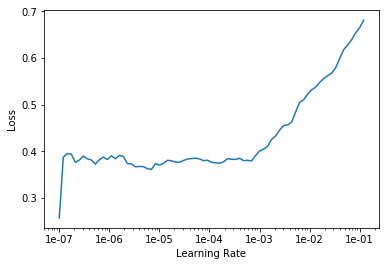

In [127]:
learner.lr_find()
learner.recorder.plot(skip_start=0)

In [128]:
lr = 2e-5
lrs = learner.lr_range(slice(lr))

In [129]:
learner.fit_one_cycle(5, lrs)

epoch,train_loss,valid_loss,accuracy
1,0.380790,0.344722,0.876096
2,0.378139,0.346135,0.877193
3,0.367442,0.349241,0.877193
4,0.363388,0.347008,0.875365
5,0.359803,0.346089,0.877924


In [130]:
learner.fit_one_cycle(5, lrs*10)

epoch,train_loss,valid_loss,accuracy
1,0.361680,0.345941,0.875365
2,0.371206,0.342848,0.877924
3,0.370585,0.347346,0.880482
4,0.334194,0.341777,0.877193
5,0.330343,0.339959,0.877558


In [131]:
learner.fit_one_cycle(5, lrs*10)

epoch,train_loss,valid_loss,accuracy
1,0.322835,0.339058,0.880117
2,0.337718,0.372899,0.871345
3,0.318010,0.337358,0.877558
4,0.319065,0.340791,0.881944
5,0.306093,0.341843,0.881944


In [132]:
learner.save('final_stage1')

In [137]:
preds,y,losses = learner.get_preds(with_loss=True)

In [140]:
interp = ClassificationInterpretation(data2, preds, y, losses)

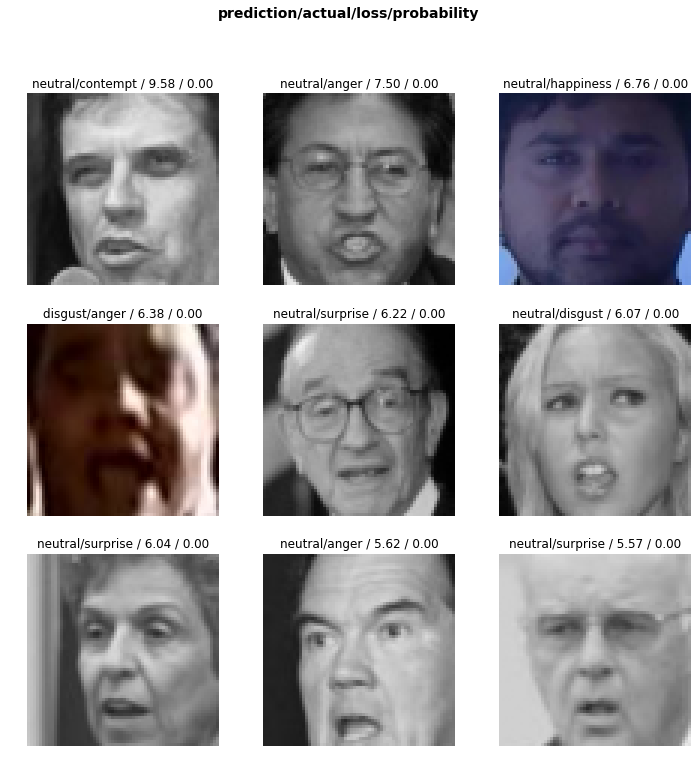

In [142]:
interp.plot_top_losses(9)